# 수치입력 수치 예측 모델 레시피
## 3. 다층퍼셉트론 신경망 모델

In [1]:
import numpy as np
import random
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


### 데이터셋 준비

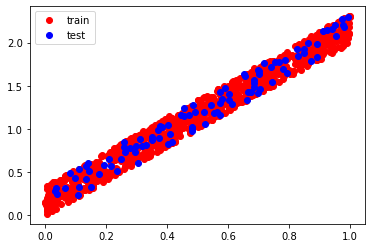

In [2]:
# 데이터셋 생성
x_train = np.random.random((1000, 1))
y_train = x_train * 2 + np.random.random((1000, 1))/3.0
x_test = np.random.random((100, 1))
y_test = x_test * 2 + np.random.random((100, 1))/3.0

#데이터셋 확인
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(x_train, y_train, 'ro')
plt.plot(x_test, y_test, 'bo')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### GPU 문제 해결 - Tensorflow Backend 엔진 설정

In [4]:
import tensorflow as tf
from keras.backend import tensorflow_backend as K
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
K.set_session(tf.Session(config=config))

### 다층퍼셉트론 모델

In [5]:
# 모델 구성하기
model = Sequential()
model.add(Dense(64, input_dim=1, activation='relu'))
model.add(Dense(1))

W0904 17:57:41.928519  9236 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0904 17:57:41.930503  9236 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0904 17:57:41.934047  9236 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [6]:
# 모델 학습과정 설정하기
model.compile(optimizer='rmsprop', loss='mse')

W0904 17:57:46.991909  9236 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [7]:
# 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=50, batch_size=64)

W0904 17:57:50.982855  9236 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:1033: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0904 17:57:50.989799  9236 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:1020: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Epoch 1/50
1000/1000 [==============================] - 0s 496us/step - loss: 1.3142
Epoch 2/50
1000/1000 [==============================] - 0s 54us/step - loss: 0.9373
Epoch 3/50
1000/1000 [==============================] - 0s 55us/step - loss: 0.6696
Epoch 4/50
1000/1000 [==============================] - 0s 54us/step - loss: 0.4515
Epoch 5/50
1000/1000 [==============================] - 0s 61us/step - loss: 0.2830
Epoch 6/50
1000/1000 [==============================] - 0s 58us/step - loss: 0.1649
Epoch 7/50
1000/1000 [==============================] - 0s 57us/step - loss: 0.0975
Epoch 8/50
1000/1000 [==============================] - 0s 62us/step - loss: 0.0724
Epoch 9/50
1000/1000 [==============================] - 0s 61us/step - loss: 0.0601
Epoch 10/50
1000/1000 [==============================] - 0s 64us/step - loss: 0.0472
Epoch 11/50
1000/1000 [==============================] - 0s 64us/step - loss: 0.0349
Epoch 12/50
1000/1000 [==============================] - 0s 64us/step - l

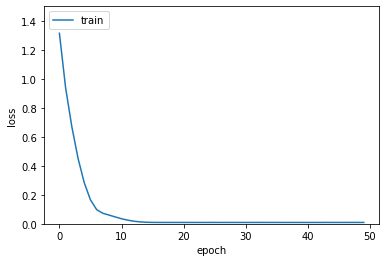

In [8]:
# 학습과정 살펴보기
plt.plot(hist.history['loss'])
plt.ylim(0.0, 1.5)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

### 모델 평가하기

In [9]:
loss = model.evaluate(x_test, y_test, batch_size=32)
print('loss : ' + str(loss))

100/100 [==============================] - 0s 1ms/step
loss : 0.009851568937301635
